In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from windrose import WindroseAxes, WindAxes, plot_windrose
import datetime

In [2]:
df = pd.read_csv(r'C:\Users\vitor\Desktop\MBA CIENCIAS DE DADOS\T1.csv')
df.columns = ['data', 'activepower', 'velocidadevento', 'curvateorica', 'direcaovento']
df['data'] = pd.to_datetime(df['data'].sort_values())
df['mes'] = df['data'].dt.month
display(df.loc[df['mes']].count())


data               50530
activepower        50530
velocidadevento    50530
curvateorica       50530
direcaovento       50530
mes                50530
dtype: int64

Text(0.5, 1.0, 'Curva teórica')

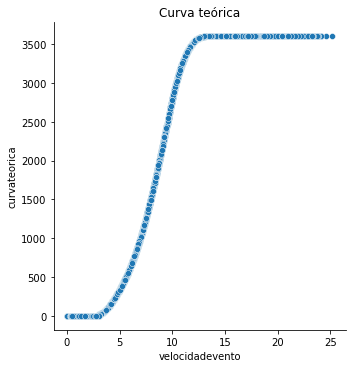

In [3]:

sns.relplot(data=df, x="velocidadevento", y="curvateorica",kind="scatter").figure.set_size_inches(5, 5)
plt.title('Curva teórica')

Text(0.5, 1.0, 'Distribuição dos dados ao longo do mês')

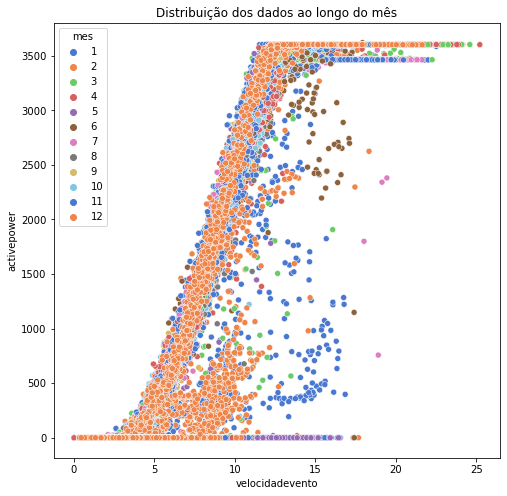

In [4]:
#Verificação de pontos de geração de energia x curva teórica.
#sns.scatterplot(data=df, x="velocidadevento", y="curvateorica").figure.set_size_inches(10, 10)



sns.scatterplot(data=df, x="velocidadevento", y="activepower", hue='mes',palette="muted").figure.set_size_inches(8, 8)
plt.title('Distribuição dos dados ao longo do mês')

# Por que alguns pontos estão fora do limite acceitavel da curva teórica ?
# Qual limite aceitavel de variação em reção a curva teórica ?
# O que influencia nos rendimentos dos aerogeradores ?


Text(0.5, 1.08, 'Rosa dos ventos')

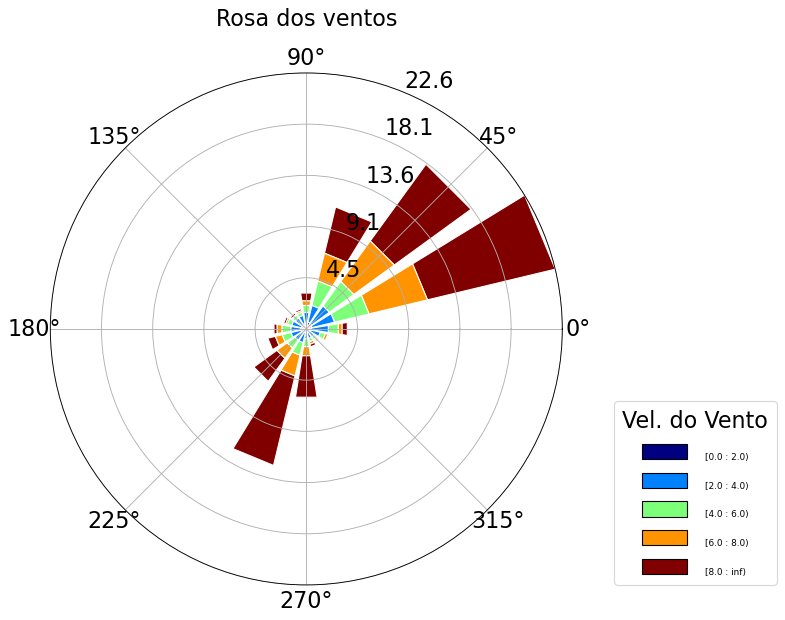

In [5]:
#Definindo o tamnho da fonte para os labels N, N-E, E, etc..., 
# e também aumenta o título da legenda
plt.rcParams["font.size"] = 20  

#Criando o eixo da rosa dos ventos
ax = WindroseAxes.from_ax()

#Plotando os dados
ax.bar(df.direcaovento, df.velocidadevento, 
       normed=True, bins=np.arange(0,10,2), 
       opening=0.8, edgecolor='white')

#Inserindo a legenda 
#(loc se refere à posição da legenda)
#Shadow=False para que a caixa da legenda não tenha sombra
lgd = ax.set_legend(title='Vel. do Vento', loc=(1.1, 0), shadow=False)

#Inserindo o título do gráfico
plt.title("Rosa dos ventos", y=1.08, fontsize='20')


#Nota-se que há uma direção do vento que apresenta mais força
#Precisamos identificar a epoca do ano em que esse vendo é mais forte.

<AxesSubplot:xlabel='velocidadevento', ylabel='activepower'>

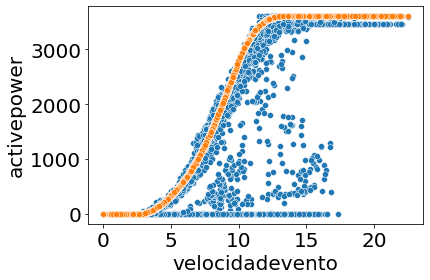

In [6]:
mes1 = df.loc[df['mes'] ==1]
sns.scatterplot(data=mes1, x="velocidadevento", y="activepower")
sns.scatterplot(data=mes1, x="velocidadevento", y="curvateorica")

<AxesSubplot:xlabel='mes', ylabel='velocidadevento'>

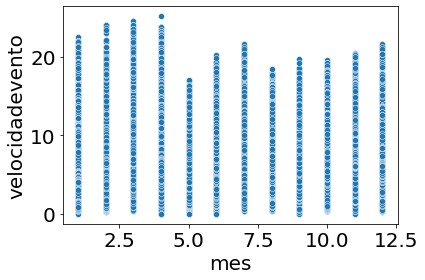

In [7]:
#Separar as datas por mês
sns.scatterplot(data=df, x=df['mes'], y="velocidadevento")

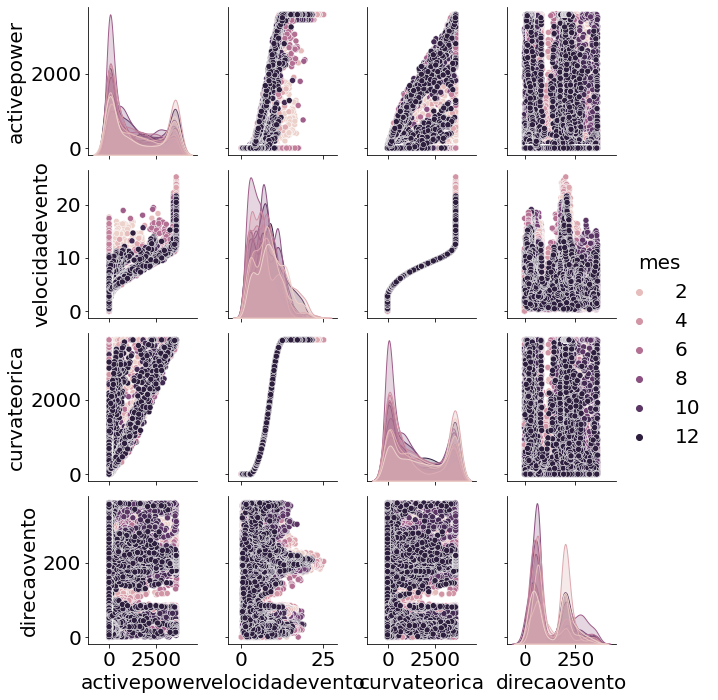

In [8]:
sns.pairplot(data=df, hue='mes').figure.set_size_inches(10, 10)


In [9]:
# No grafico Velocidade do vento X Direçao do vento  - >  Podemos visualizar que há direções específicas que produzem 
# maiores velocidades.

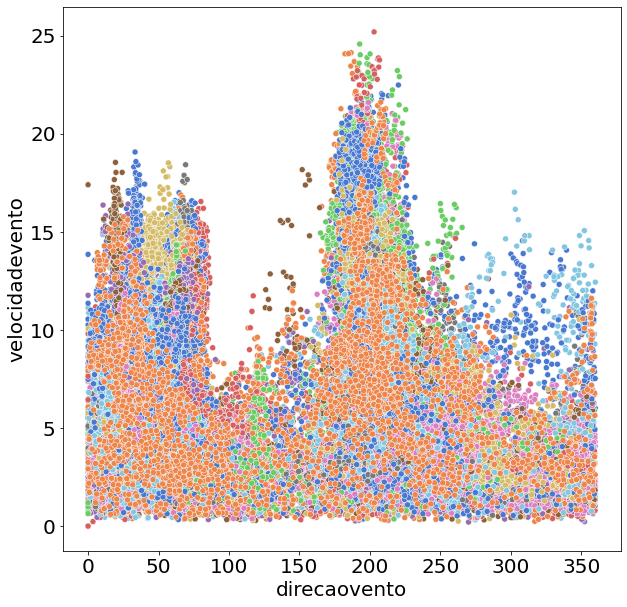

In [10]:
sns.scatterplot(data=df, x='direcaovento', y="velocidadevento", hue='mes', palette='muted', legend = False).figure.set_size_inches(10,10)

In [11]:
velocidade_vento = df.loc[df['velocidadevento'] < 13]

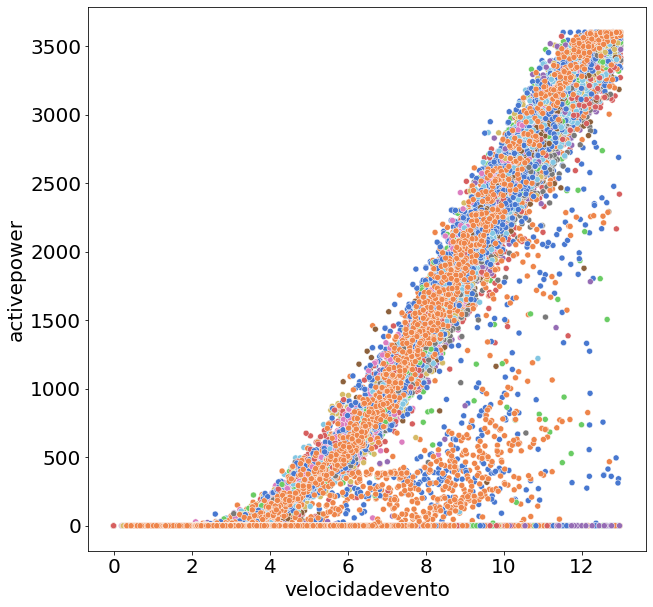

In [12]:
sns.scatterplot(data=velocidade_vento, x='velocidadevento', y="activepower", hue='mes', palette='muted', legend = False).figure.set_size_inches(10,10)

O que interfere no poder ativo?
Por que alguns pontos estão com velocidade do vento elevada mas isso não se traduz em maior Poder Ativo ?

Vamos visualizar outro dataset para podermos nos apronfundar nas análises.

In [13]:
colunas = ['data','Poder ativo', 'Temperatura Ambiente','Temperatura do eixo do rolamento', 'angulo de inclinação da lâmina 1', 'angulo de inclinação da lâmina 2', 'angulo de inclinação da lâmina 3', 
           'Temperatura da caixa de controle', 'Temperatura do rolamento da caixa de engrenagens', 'Temperatura do óleo da caixa de engrenagens','Gerador de RPM', 'Temperatura do enrolamento 1 do gerador', 
           'Temperatura do enrolamento do gerador 2', 'Temperatura do cubo', 'Temperatura da caixa principal','Posição da Nacele', 'Potência Reativa', 'RPM do rotor', 'Status da turbina', 'WTG', 'Direção do vento', 'Velocidade do vento']

df2 = pd.read_csv(r"C:\Users\vitor\Desktop\MBA CIENCIAS DE DADOS\Turbine_Data.csv")
df2.columns = colunas
# df2 = df2.dropna()
# df2 = df2.reset_index()
display(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 22 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   data                                              118224 non-null  object 
 1   Poder ativo                                       94750 non-null   float64
 2   Temperatura Ambiente                              93817 non-null   float64
 3   Temperatura do eixo do rolamento                  62518 non-null   float64
 4   angulo de inclinação da lâmina 1                  41996 non-null   float64
 5   angulo de inclinação da lâmina 2                  41891 non-null   float64
 6   angulo de inclinação da lâmina 3                  41891 non-null   float64
 7   Temperatura da caixa de controle                  62160 non-null   float64
 8   Temperatura do rolamento da caixa de engrenagens  62540 non-null   float64
 9   Temp

None

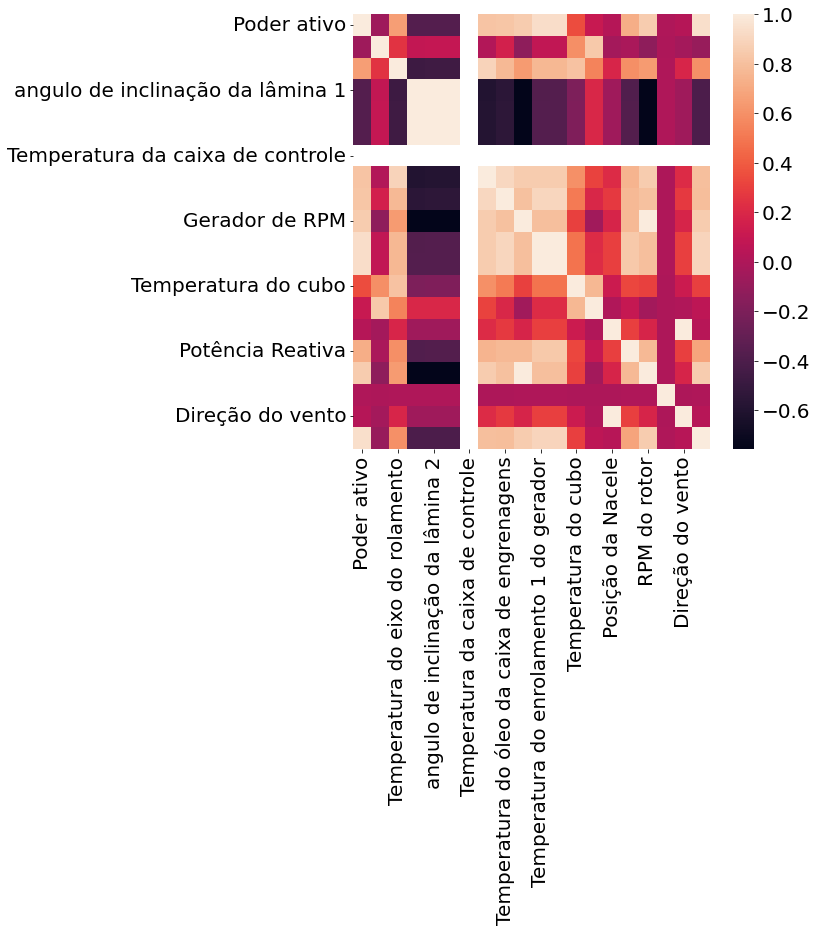

In [27]:
sns.heatmap(df2.corr()).figure.set_size_inches(8,8)

In [15]:
df2.corr()

,Poder ativo,Temperatura Ambiente,Temperatura do eixo do rolamento,angulo de inclinação da lâmina 1,angulo de inclinação da lâmina 2,angulo de inclinação da lâmina 3,Temperatura da caixa de controle,Temperatura do rolamento da caixa de engrenagens,Temperatura do óleo da caixa de engrenagens,Gerador de RPM,Temperatura do enrolamento 1 do gerador,Temperatura do enrolamento do gerador 2,Temperatura do cubo,Temperatura da caixa principal,Posição da Nacele,Potência Reativa,RPM do rotor,Status da turbina,Direção do vento,Velocidade do vento
Poder ativo,1.000000,-0.065637,0.655400,-0.368997,-0.367978,-0.367978,NaN,0.818850,0.821921,0.849604,0.931390,0.932521,0.347363,0.101627,0.028108,0.719092,0.849069,-0.000135,0.028108,0.940390
Temperatura Ambiente,-0.065637,1.000000,0.246505,0.085461,0.090904,0.090904,NaN,0.017216,0.162511,-0.130123,0.077859,0.078736,0.589729,0.836539,-0.037498,-0.020313,-0.129290,-0.005511,-0.037498,-0.095308
Temperatura do eixo do rolamento,0.655400,0.246505,1.000000,-0.475557,-0.466856,-0.466856,NaN,0.883344,0.772887,0.640947,0.765115,0.763926,0.809116,0.542104,0.183929,0.594546,0.640584,-0.000990,0.183929,0.596201
angulo de inclinação da lâmina 1,-0.368997,0.085461,-0.475557,1.000000,0.997774,0.997774,NaN,-0.599178,-0.557949,-0.757056,-0.376102,-0.372369,-0.198583,0.194911,-0.058300,-0.381478,-0.757147,-0.000534,-0.058300,-0.403092
angulo de inclinação da lâmina 2,-0.367978,0.090904,-0.466856,0.997774,1.000000,1.000000,NaN,-0.592103,-0.549792,-0.754325,-0.371057,-0.367451,-0.190296,0.190562,-0.057624,-0.379541,-0.754539,-0.000636,-0.057624,-0.402786
angulo de inclinação da lâmina 3,-0.367978,0.090904,-0.466856,0.997774,1.000000,1.000000,NaN,-0.592103,-0.549792,-0.754325,-0.371057,-0.367451,-0.190296,0.190562,-0.057624,-0.379541,-0.754539,-0.000636,-0.057624,-0.402786
Temperatura da caixa de controle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperatura do rolamento da caixa de engrenagens,0.818850,0.017216,0.883344,-0.599178,-0.592103,-0.592103,NaN,1.000000,0.906020,0.850209,0.853024,0.851923,0.596065,0.307694,0.214486,0.751875,0.850795,-0.002314,0.214486,0.800433
Temperatura do óleo da caixa de engrenagens,0.821921,0.162511,0.772887,-0.557949,-0.549792,-0.549792,NaN,0.906020,1.000000,0.806972,0.899693,0.898335,0.506648,0.190350,0.277619,0.770088,0.807776,-0.004536,0.277619,0.793140
Gerador de RPM,0.849604,-0.130123,0.640947,-0.757056,-0.754325,-0.754325,NaN,0.850209,0.806972,1.000000,0.796434,0.795223,0.303804,-0.052185,0.176964,0.768065,0.999723,0.001133,0.176964,0.854787


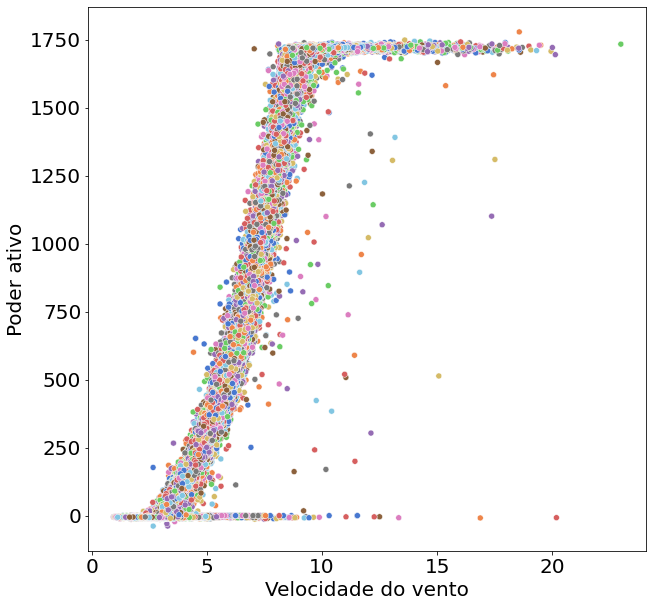

In [34]:
sns.scatterplot(data=df2, x='Velocidade do vento', y="Poder ativo", hue='Temperatura do cubo', palette='muted', legend = False ).figure.set_size_inches(10,10)